Lab 07 - done together by Rya PC and Jyosna Philip


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC

C:\Users\jyosn\AppData\Local\Temp\ipykernel_13680\4002927767.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_csv("nasav3.csv")
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True


In [4]:
d={True:1,False:0}
df["Hazardous"]=df["Hazardous"].map(d)
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,1
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,0
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,1
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,0
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,1


In [5]:
df.drop(columns=["Name","Neo Reference ID"],inplace=True)
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,933.308089,01-01-1995,...,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,1
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,01-01-1995,...,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,0
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,08-01-1995,...,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,1
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,15-01-1995,...,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,0
4,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,933.308089,15-01-1995,...,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,1


In [6]:
df.describe()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
count,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000
mean,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,1501.013521,1.179895e+12,...,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242,0.161084
std,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,2711.257465,1.981188e+11,...,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627,0.367647
min,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,7.890000e+11,...,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,0.000000
25%,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,1.020000e+12,...,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289,0.000000
50%,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,1.200000e+12,...,10.311836,172.625394,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946,0.000000
75%,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,1862.194459,1.360000e+12,...,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669,0.000000
max,32.100000,15.579552,34.836938,15579.552410,34836.938250,9.680682,21.646663,51114.018740,114294.420500,1.470000e+12,...,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000,1.000000


In [7]:
df.drop(columns=["Est Dia in M(min)","Est Dia in M(max)","Est Dia in Miles(min)","Est Dia in Miles(max)","Est Dia in Feet(min)","Est Dia in Feet(max)"],inplace=True)


In [8]:
df.drop(columns=["Relative Velocity km per hr","Miss Dist.(lunar)"],inplace=True)

In [9]:
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(kilometers),Miss Dist.(miles),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.6,0.127220,0.284472,01-01-1995,7.890000e+11,6.115834,13680.50994,0.419483,62753692.0,38993336.0,...,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,1
1,21.3,0.146068,0.326618,01-01-1995,7.890000e+11,18.113985,40519.17311,0.383014,57298148.0,35603420.0,...,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,0
2,20.3,0.231502,0.517654,08-01-1995,7.900000e+11,7.590711,16979.66180,0.050956,7622911.5,4736657.5,...,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,1
3,27.4,0.008801,0.019681,15-01-1995,7.900000e+11,11.173875,24994.83986,0.285322,42683616.0,26522368.0,...,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,0
4,21.6,0.127220,0.284472,15-01-1995,7.900000e+11,9.840831,22012.95498,0.407832,61010824.0,37910368.0,...,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,1


In [10]:
df.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Close Approach Date', 'Epoch Date Close Approach',
       'Relative Velocity km per sec', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(kilometers)',
       'Miss Dist.(miles)', 'Orbiting Body', 'Orbit ID',
       'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [11]:
df.drop(columns=["Miss Dist.(Astronomical)",'Miss Dist.(miles)','Orbit ID'],inplace=True)

In [12]:
df.describe()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Miles per hour,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
count,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000
mean,22.267865,0.204604,0.457509,1.179895e+12,13.970811,31251.307268,3.841347e+07,3.516962,0.082320,5.056111,...,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242,0.161084
std,2.890972,0.369573,0.826391,1.981188e+11,7.293223,16314.209644,2.181110e+07,3.078307,0.090300,1.237818,...,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627,0.367647
min,11.160000,0.001011,0.002260,7.890000e+11,0.335504,750.489149,2.660989e+04,0.000000,0.000002,2.196000,...,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,0.000000
25%,20.100000,0.033462,0.074824,1.020000e+12,8.432865,18863.475325,1.995928e+07,0.000000,0.014585,4.049500,...,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289,0.000000
50%,21.900000,0.110804,0.247765,1.200000e+12,12.917889,28896.026390,3.964771e+07,3.000000,0.047365,5.071000,...,10.311836,172.625394,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946,0.000000
75%,24.500000,0.253837,0.567597,1.360000e+12,18.077649,40437.892430,5.746863e+07,6.000000,0.123593,6.019000,...,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669,0.000000
max,32.100000,15.579552,34.836938,1.470000e+12,44.633747,99841.227830,7.478160e+07,9.000000,0.477891,9.025000,...,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000,1.000000


In [13]:
df.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Close Approach Date', 'Epoch Date Close Approach',
       'Relative Velocity km per sec', 'Miles per hour',
       'Miss Dist.(kilometers)', 'Orbiting Body', 'Orbit Determination Date',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Equinox', 'Hazardous'],
      dtype='object')

In [14]:
features=['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 'Epoch Date Close Approach',
       'Relative Velocity km per sec', 'Miles per hour',
       'Miss Dist.(kilometers)',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion']
X=df[features]
Y=df["Hazardous"]


In [15]:
tree_clf=DecisionTreeClassifier(criterion="entropy")


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y , 
                                   random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True)


In [17]:
import matplotlib.pyplot as plt

(3515, 22)


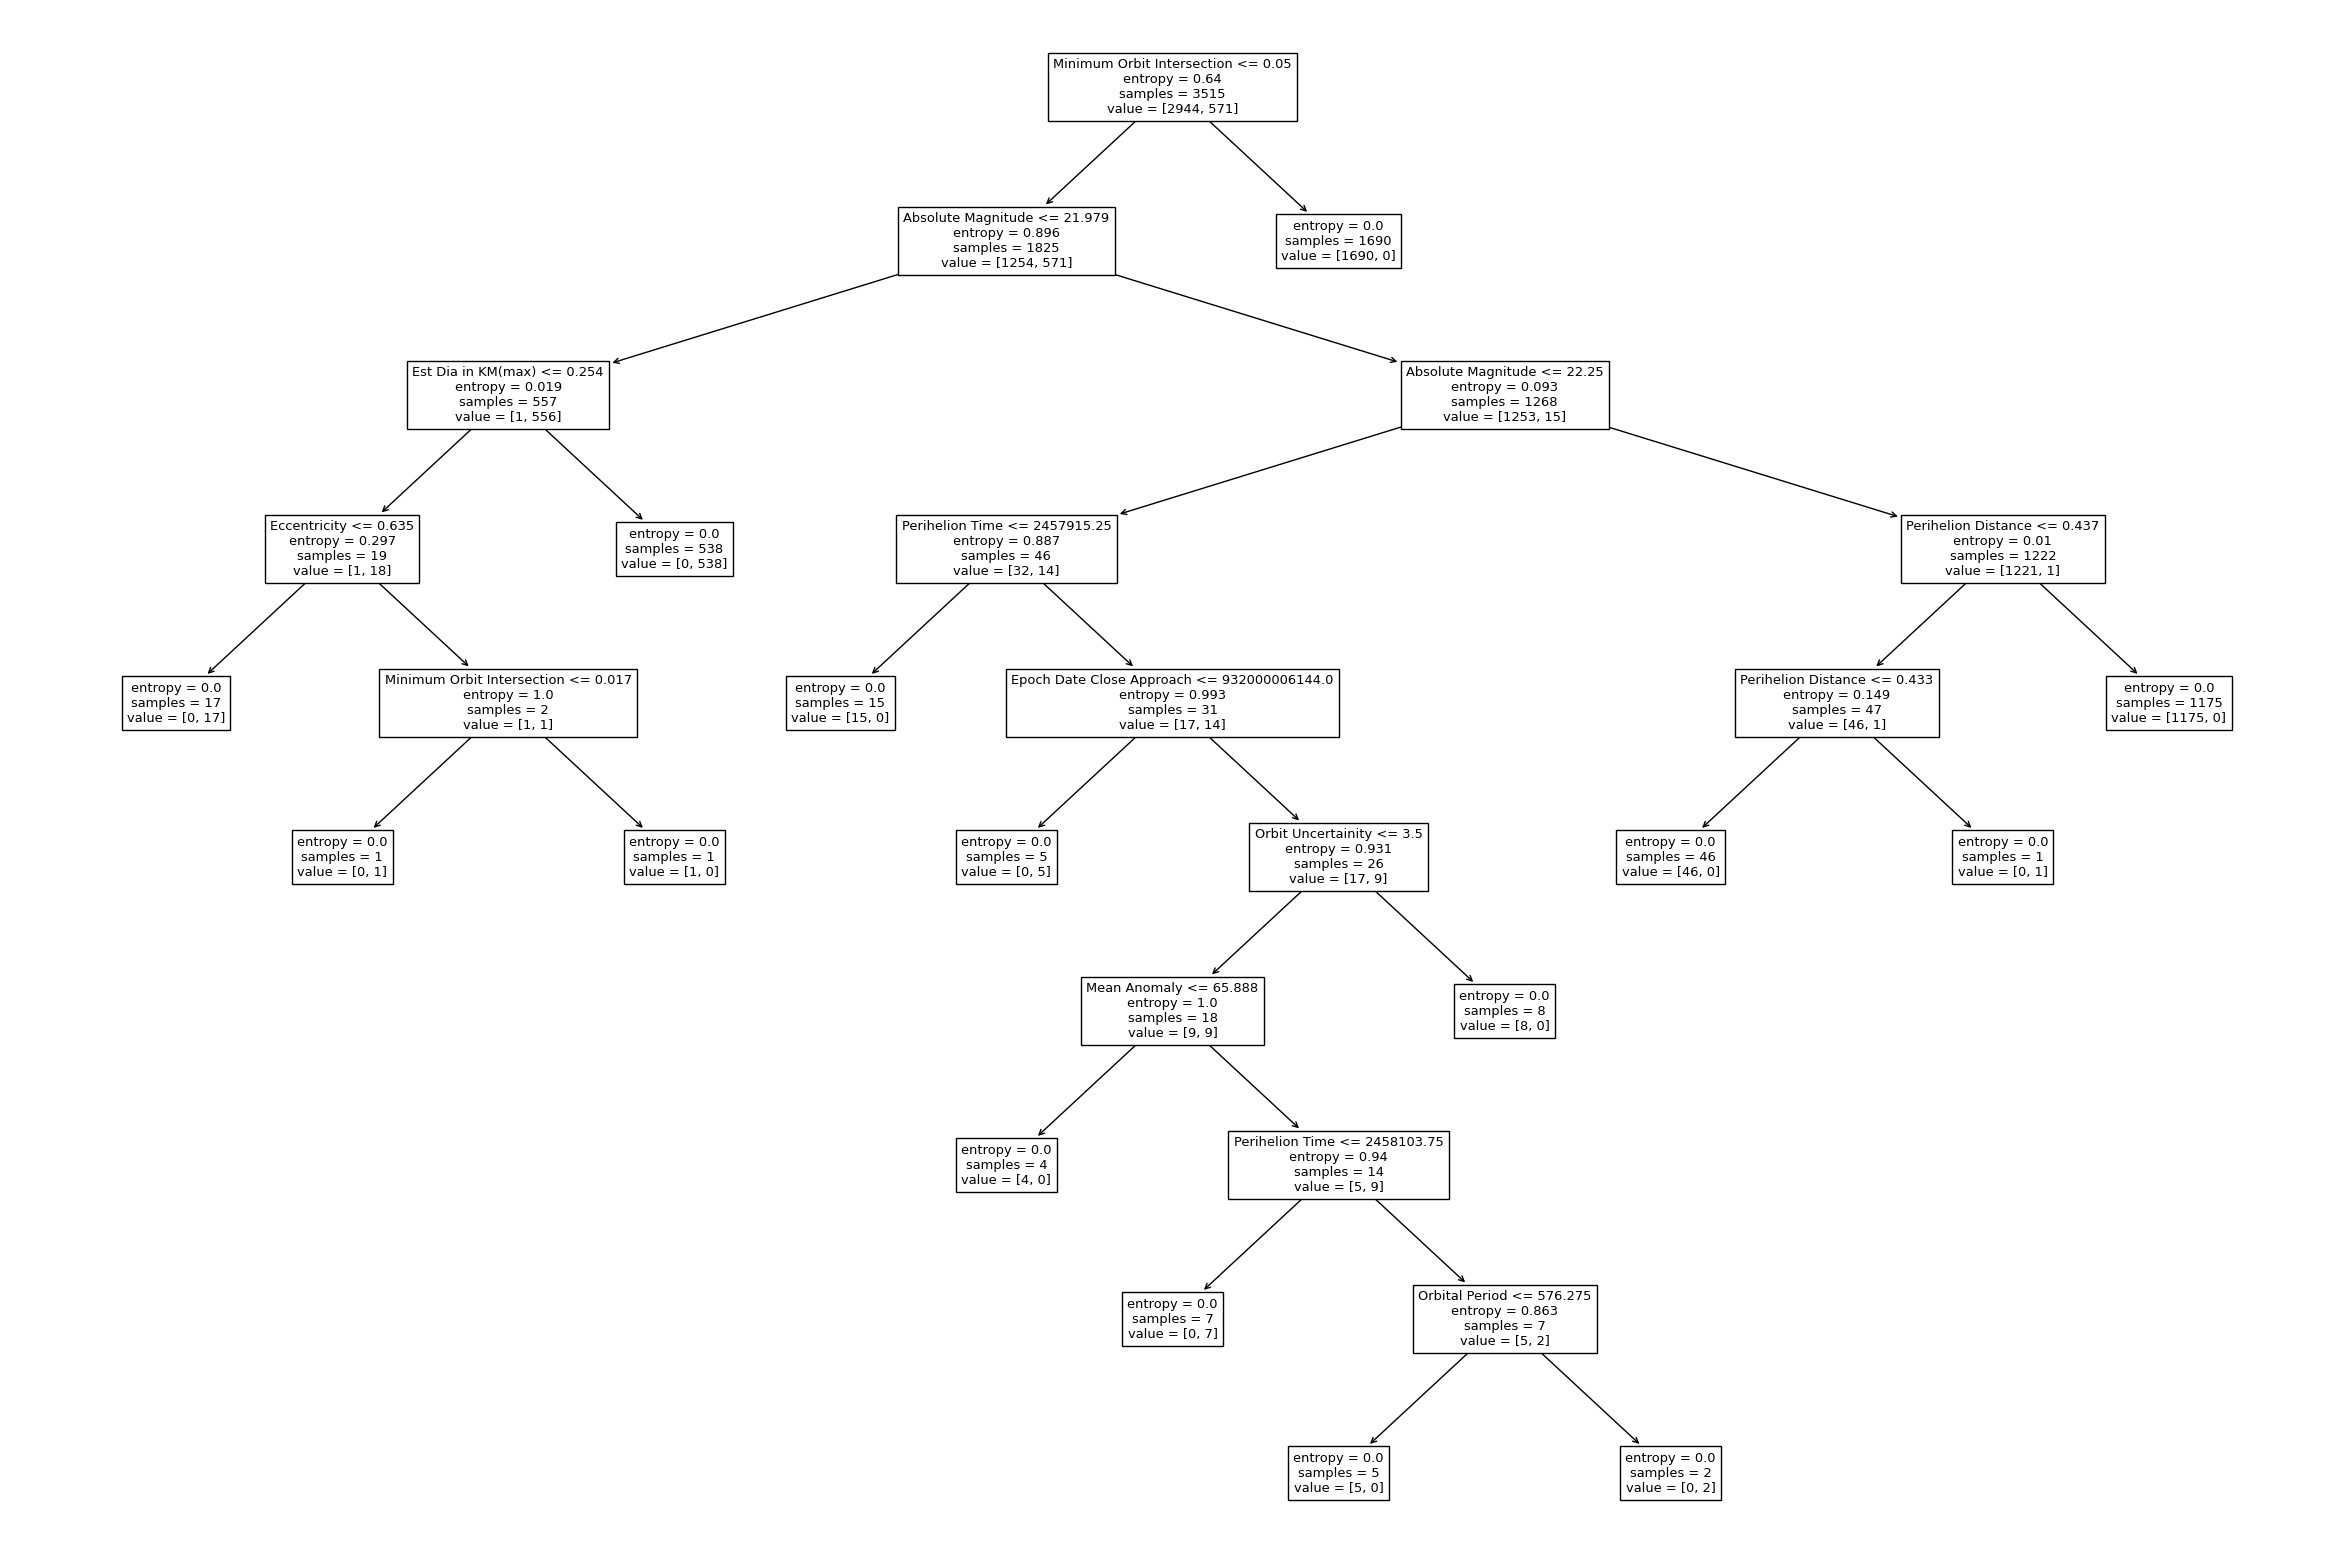

In [18]:
dtree = tree_clf.fit(X_train, y_train)
plt.figure(figsize=(30,20))
tree.plot_tree(dtree,feature_names=features)

print(X_train.shape)

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
predicted = dtree.predict(X_train)
print (accuracy_score(y_train, predicted))
predicted = dtree.predict(X_test)
print (accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted,labels=[0,1]))


1.0
0.9974402730375427
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      0.98      0.99       184

    accuracy                           1.00      1172
   macro avg       1.00      0.99      1.00      1172
weighted avg       1.00      1.00      1.00      1172



{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'splitter': 'best'}


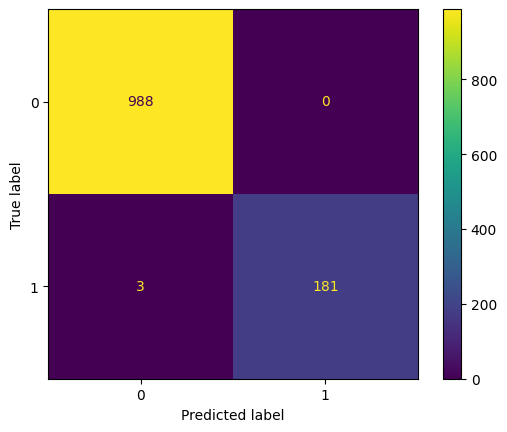

In [20]:
# labels should be the exact name of the categories
cm=confusion_matrix(y_test,predicted)
fig=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=dtree.classes_)
fig.plot()
para={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'min_samples_leaf':[2,4,6,8],
    'max_depth':[2,3,4,5]
}
from sklearn.model_selection import GridSearchCV
dtree_tuned=GridSearchCV(dtree,para,cv=10,scoring='accuracy')
dtree_tuned.fit(X_train,y_train)
#getting best parameters from gridsearch cv
print(dtree_tuned.best_params_)
tuned_predictions=dtree_tuned.predict(X_test)


0.9948805460750854

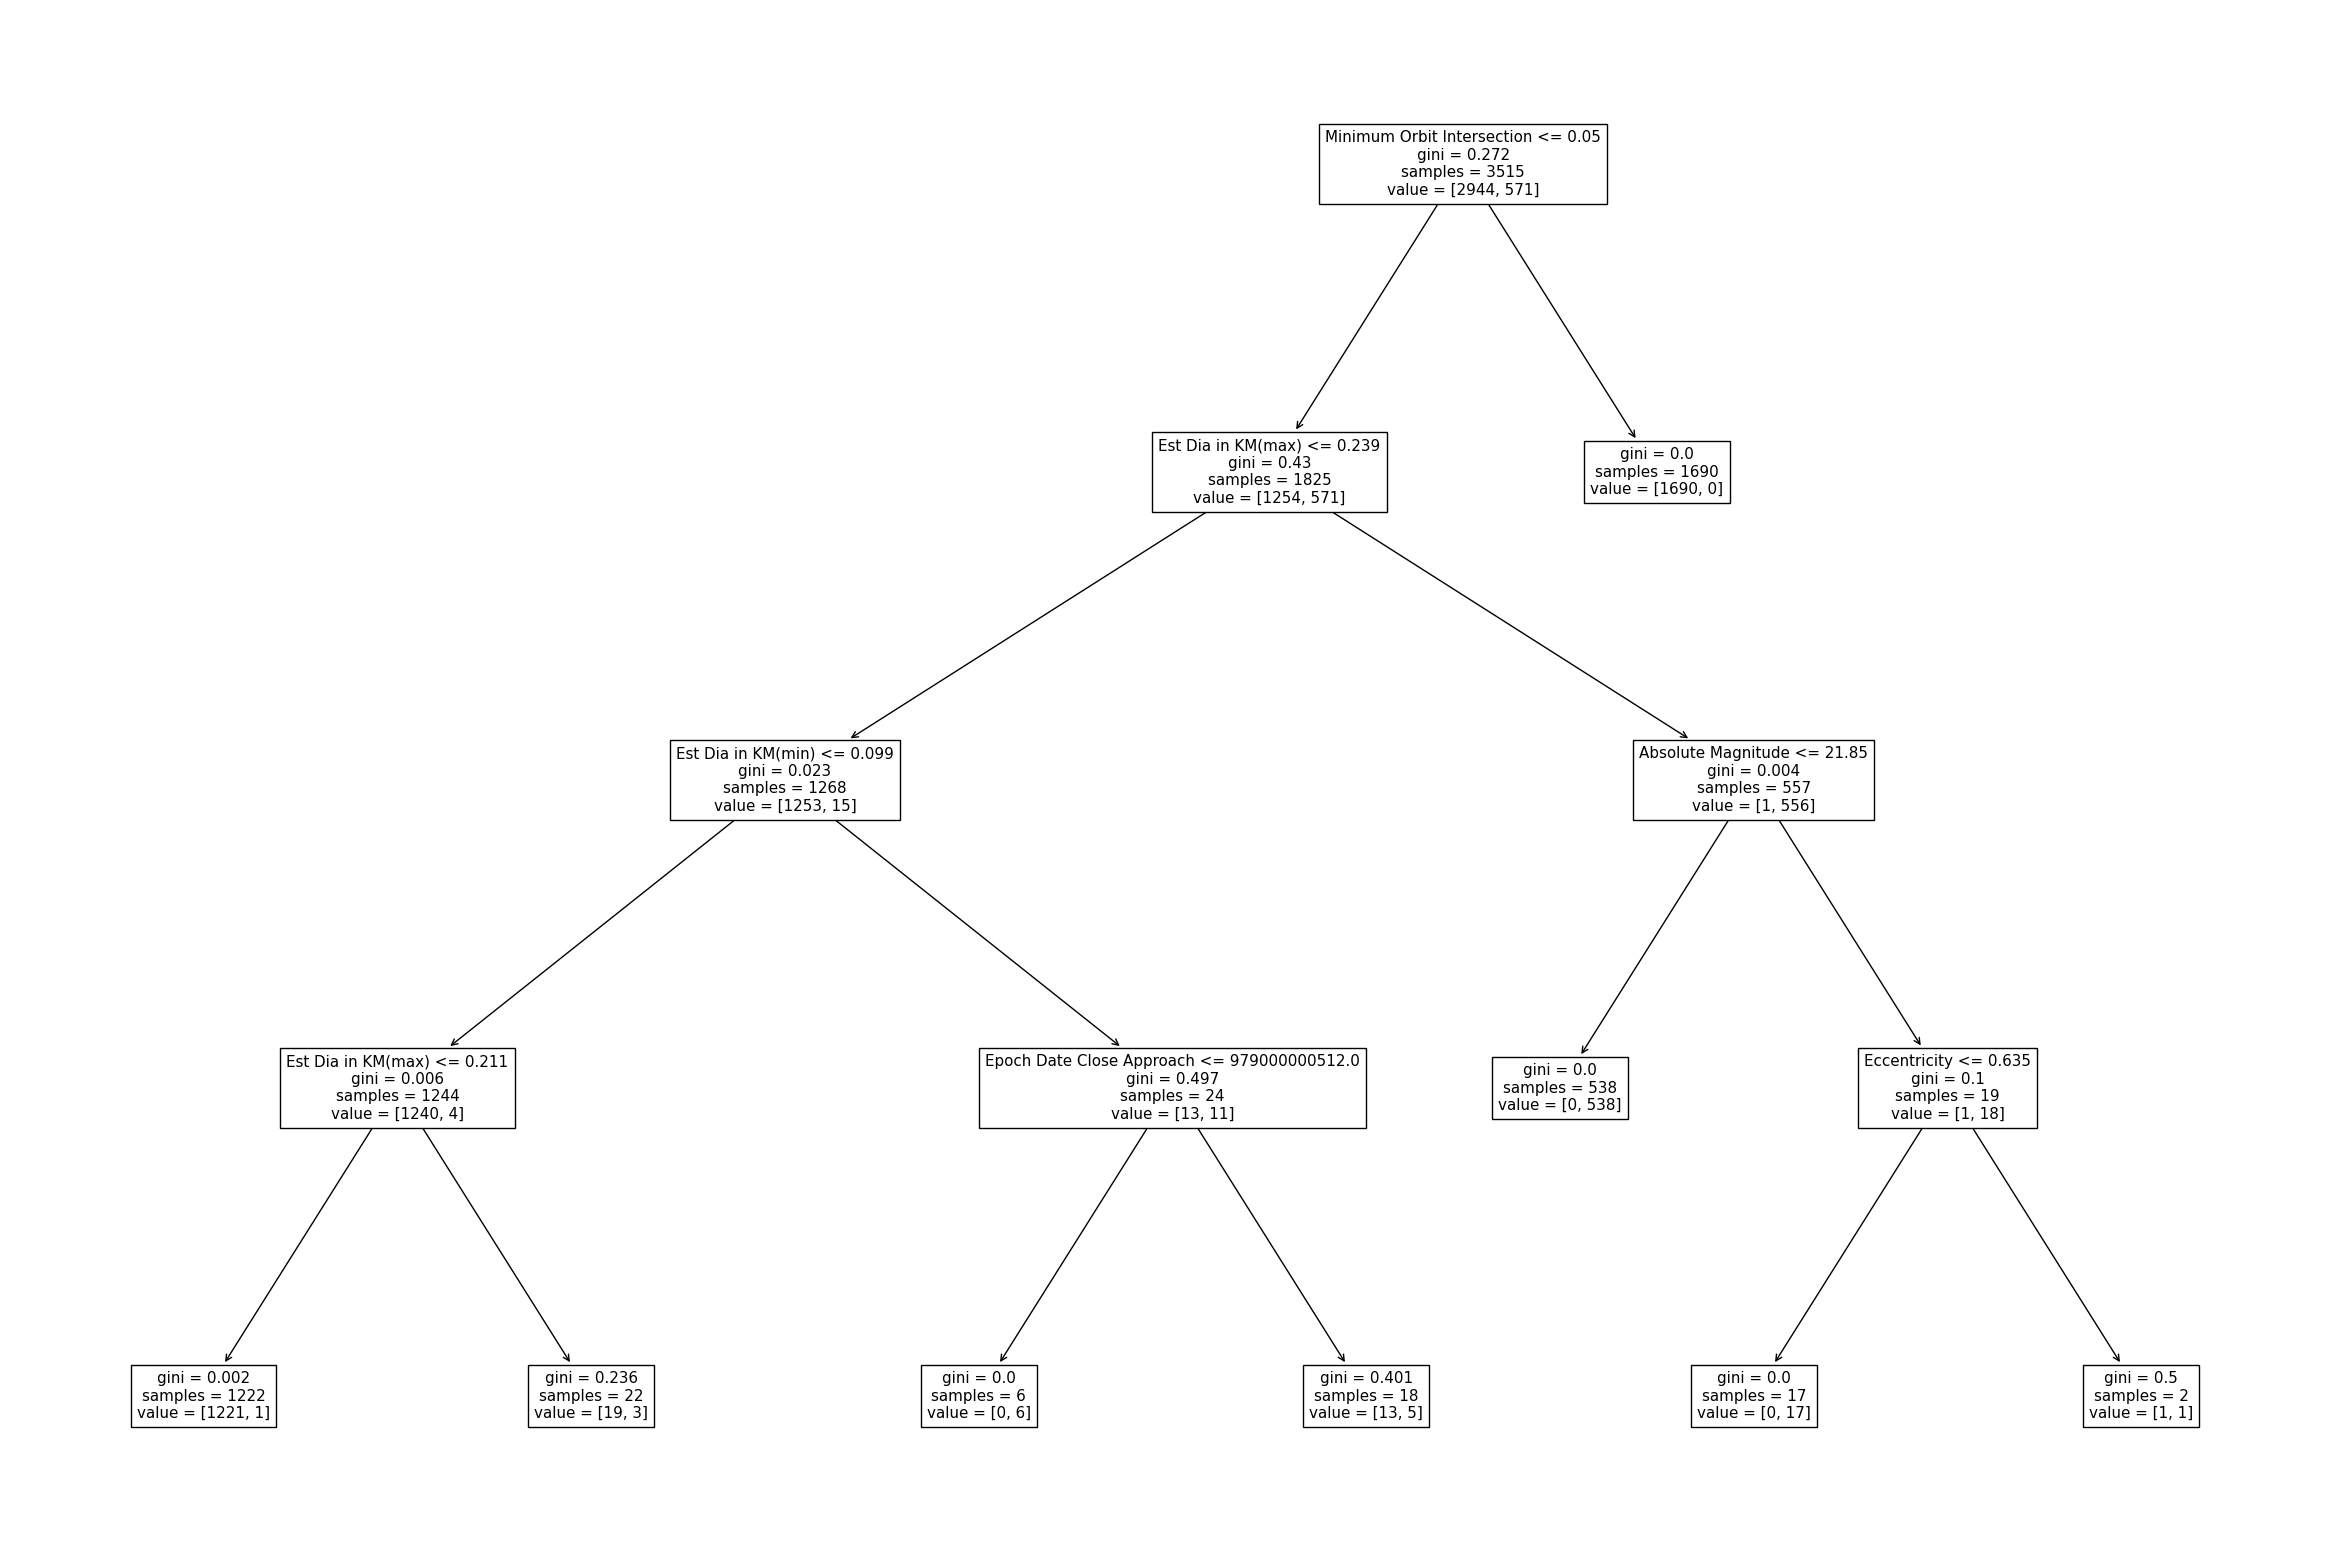

In [31]:
tree_clf=DecisionTreeClassifier(criterion= 'gini', max_depth= 4, min_samples_leaf= 2, splitter='best')
fig=plt.figure(figsize=(30,20))
tree_clf.fit(X_train,y_train)
tree.plot_tree(tree_clf,feature_names=features)
predicted=tree_clf.predict(X_test)
accuracy_score(predicted,y_test)


In [21]:

print(classification_report(y_test,tuned_predictions,labels=[0.0,1.0]))


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       988
         1.0       1.00      0.97      0.98       184

    accuracy                           0.99      1172
   macro avg       1.00      0.98      0.99      1172
weighted avg       0.99      0.99      0.99      1172



In [22]:
from sklearn.svm import SVC 
clf = SVC(kernel='poly') 

# fitting x samples and y classes 
clf.fit(X_train, y_train) 

predicted = clf.predict(X_train)
print (accuracy_score(y_train, predicted))


predicted = clf.predict(X_test)
print (accuracy_score(y_test, predicted))

print(classification_report(y_test,predicted,labels=[0.0,1.0]))
# labels should be the exact name of the categories


0.8375533428165007
0.8430034129692833
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       988
         1.0       0.00      0.00      0.00       184

    accuracy                           0.84      1172
   macro avg       0.42      0.50      0.46      1172
weighted avg       0.71      0.84      0.77      1172



C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

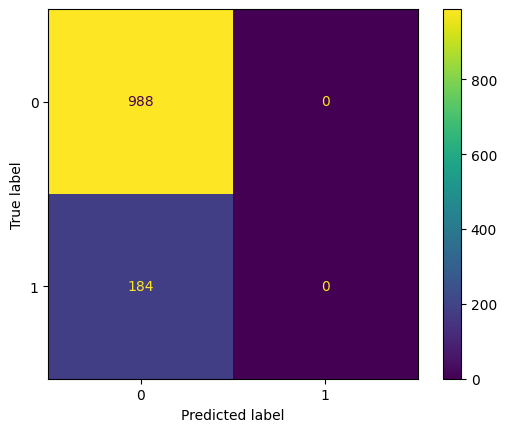

In [23]:
cm=confusion_matrix(y_test,predicted)
fig=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=dtree.classes_)
fig.plot()

In [32]:
features=['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 'Epoch Date Close Approach',
       'Relative Velocity km per sec', 'Miles per hour', 'Eccentricity',
       'Inclination', 'Asc Node Longitude', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Motion']
X=df[features]
Y=df["Hazardous"]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y , 
                                   random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True)

In [34]:
from sklearn.svm import SVC 
clf = SVC(kernel='poly') 

# fitting x samples and y classes 
clf.fit(X_train, y_train) 

predicted = clf.predict(X_train)
print (accuracy_score(y_train, predicted))


predicted = clf.predict(X_test)
print (accuracy_score(y_test, predicted))

print(classification_report(y_test,predicted,labels=[0.0,1.0]))
# labels should be the exact name of the categories


0.8375533428165007
0.8430034129692833
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       988
         1.0       0.00      0.00      0.00       184

    accuracy                           0.84      1172
   macro avg       0.42      0.50      0.46      1172
weighted avg       0.71      0.84      0.77      1172



C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

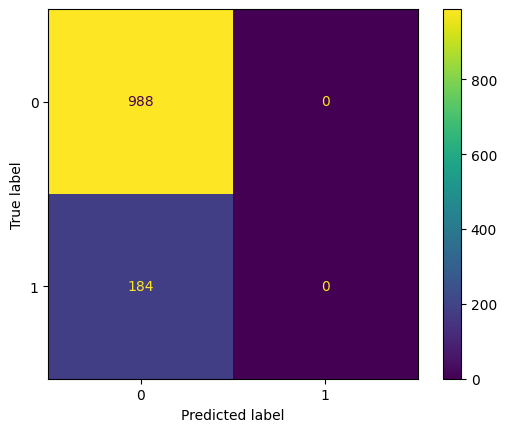

In [35]:
cm=confusion_matrix(y_test,predicted)
fig=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=dtree.classes_)
fig.plot()